In [8]:
%matplotlib notebook 
import numpy as np
import pandas as pd 
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## simple binary clasification

In [55]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, y_train, X_test, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# apply the scaling to the test set that's computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

/Users/4bic/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: operands could not be broadcast together with shapes (44,) (4,) (44,) 

## working with Datasets

<IPython.core.display.Javascript object>


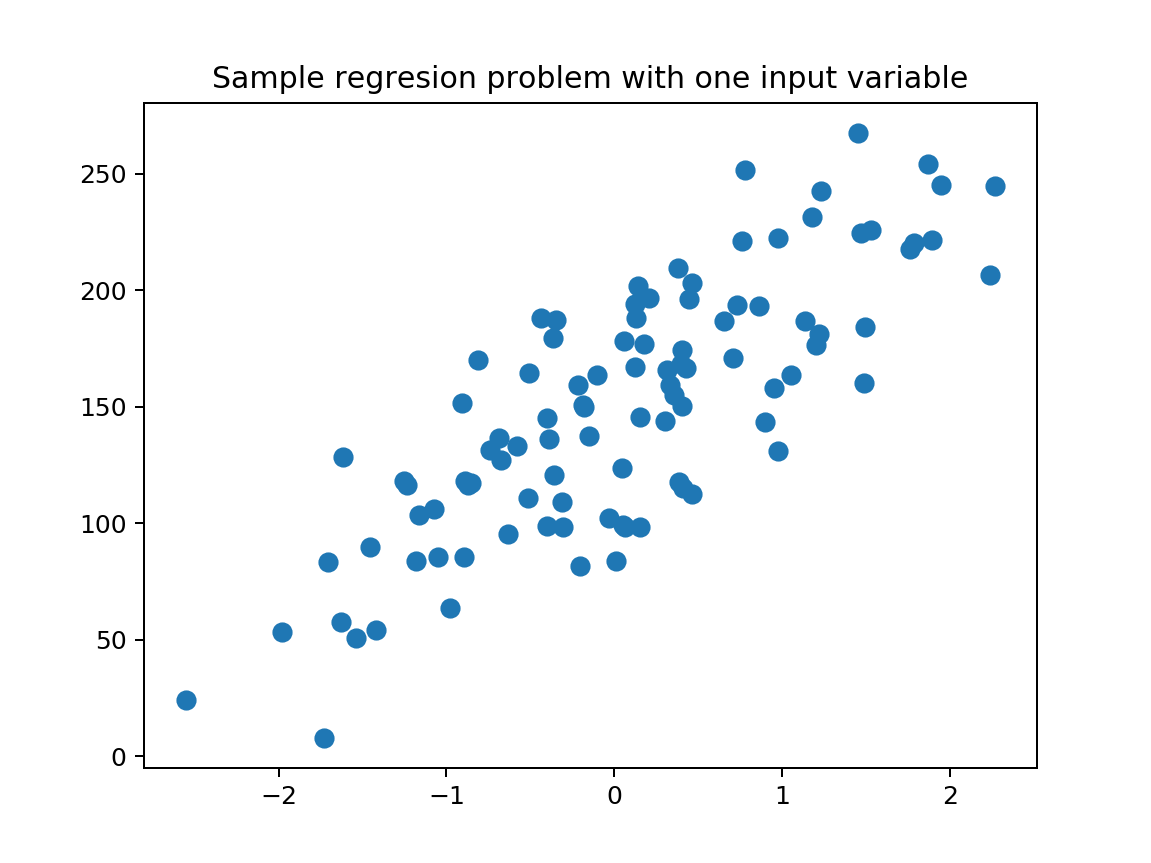

In [18]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset
import matplotlib.pyplot as plt

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regresion problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

## More complex regression

<IPython.core.display.Javascript object>


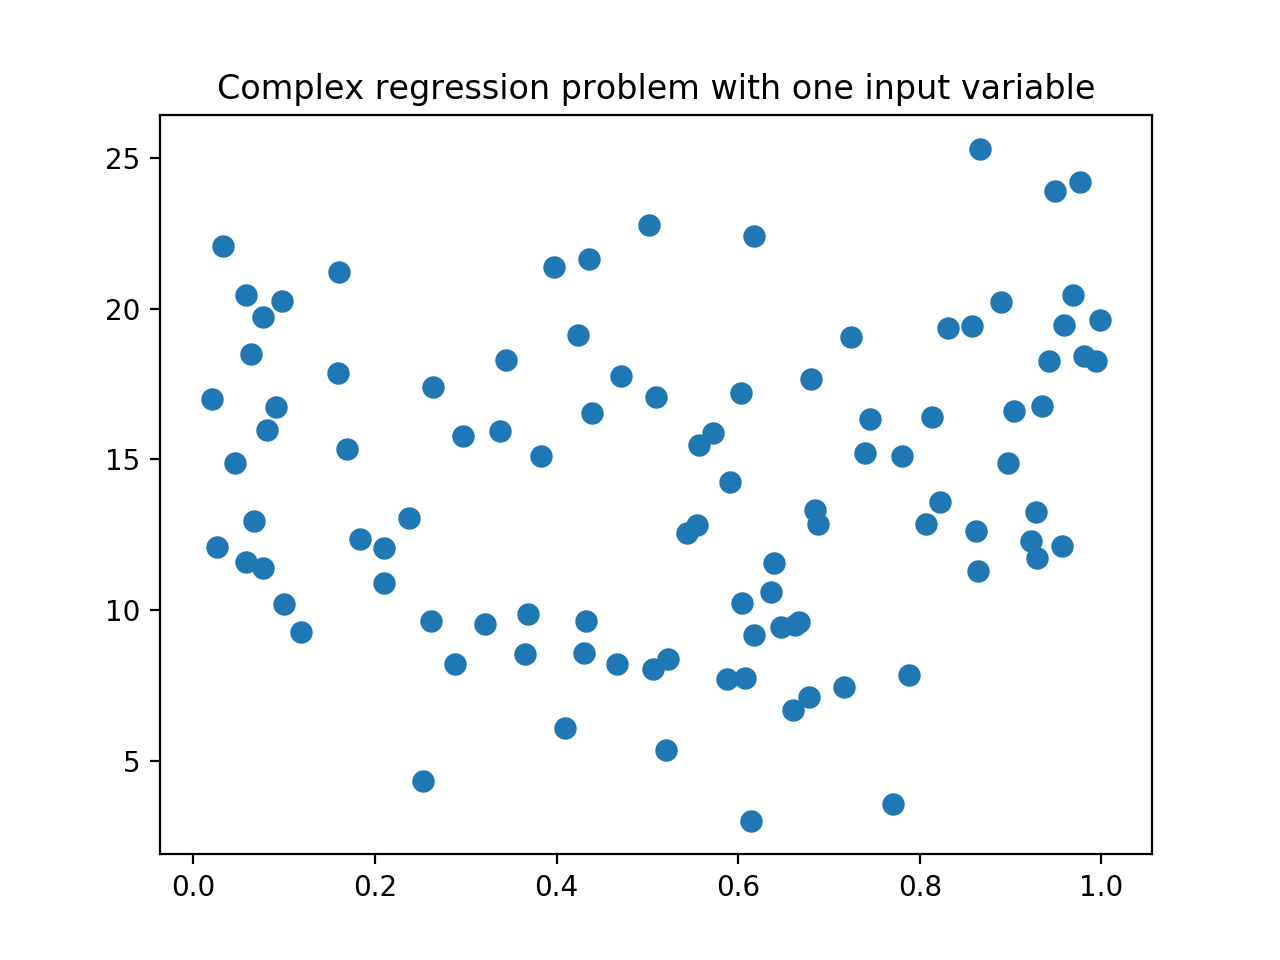

In [22]:
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

## Binary classification with two informative features

<IPython.core.display.Javascript object>


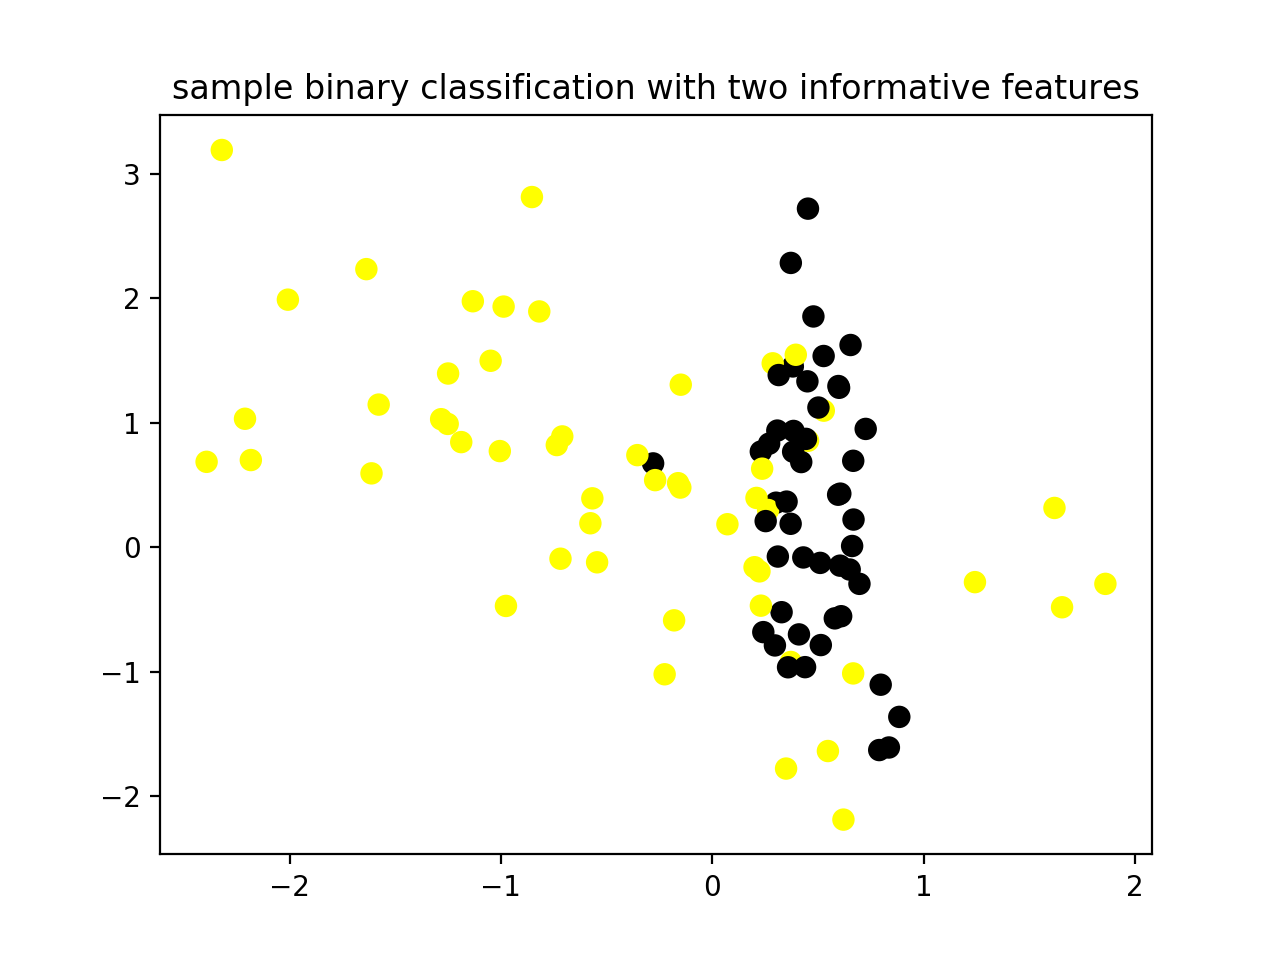

In [24]:
plt.figure()
plt.title('sample binary classification with two informative features')

X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2,
                                n_redundant = 0, n_informative = 2,
                                n_clusters_per_class =1, flip_y = 0.1,
                                class_sep = 0.5, random_state= 0 )

plt.scatter(X_C2[:, 0], X_C2[:, 1],c=y_C2,marker='o',s=50,cmap=cmap_bold)
plt.show()


 
## Binary classification with classes that are not linearly separable

<IPython.core.display.Javascript object>


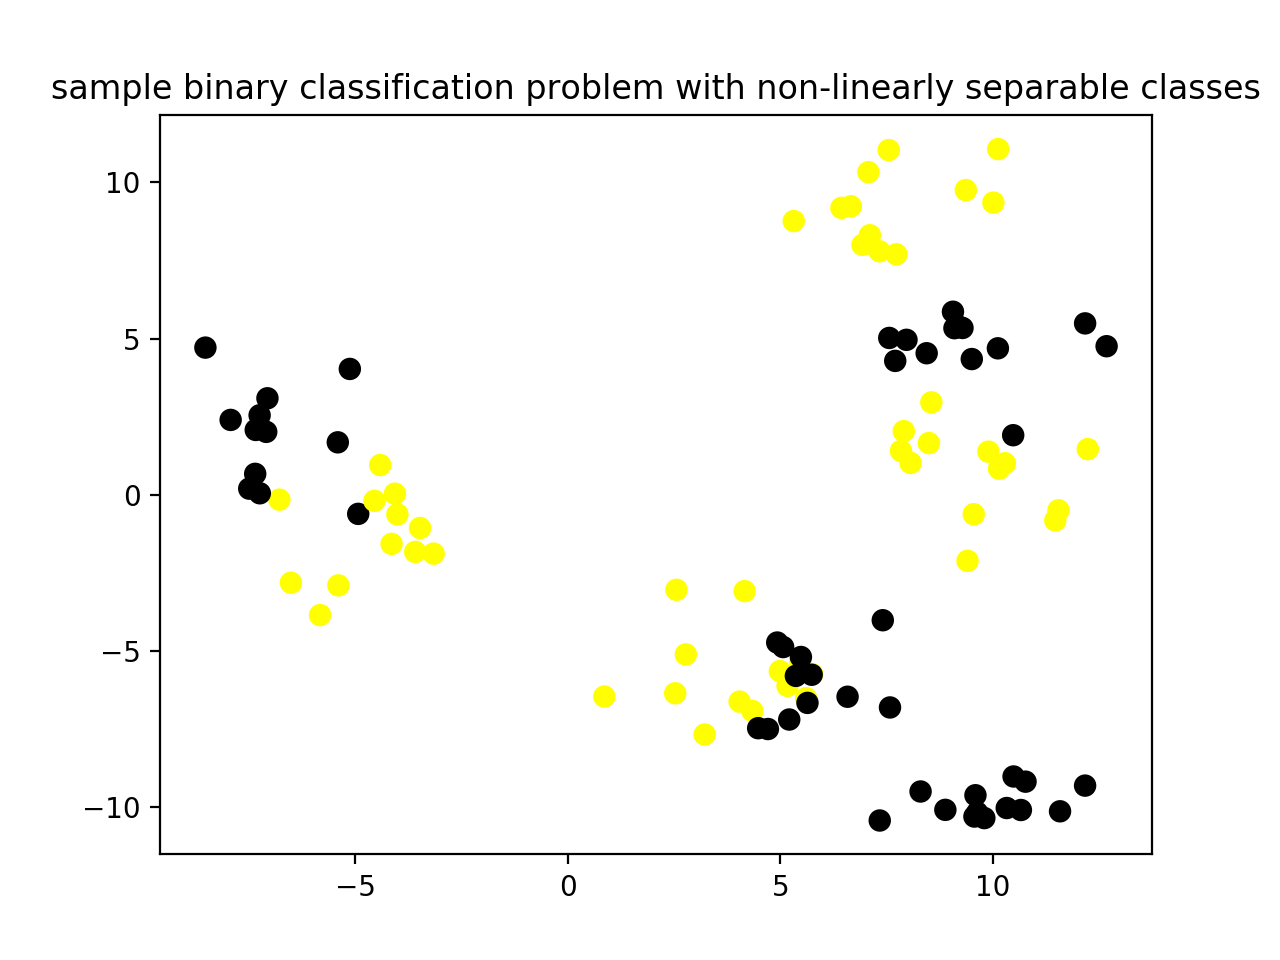

In [25]:
plt.figure()
plt.title('sample binary classification problem with non-linearly separable classes')
X_D2, y_D2 = make_blobs(n_samples = 100, n_features=2, centers=8,
                       cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2

plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker='o', s=50, cmap=cmap_bold)
plt.show()


In [26]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [52]:
# # Communities and Crime dataset
# crime = load_crime_dataset()
# (X_crime, y_crime) = load_crime_dataset()

## K-Nearest Neighbors

## classification

<IPython.core.display.Javascript object>


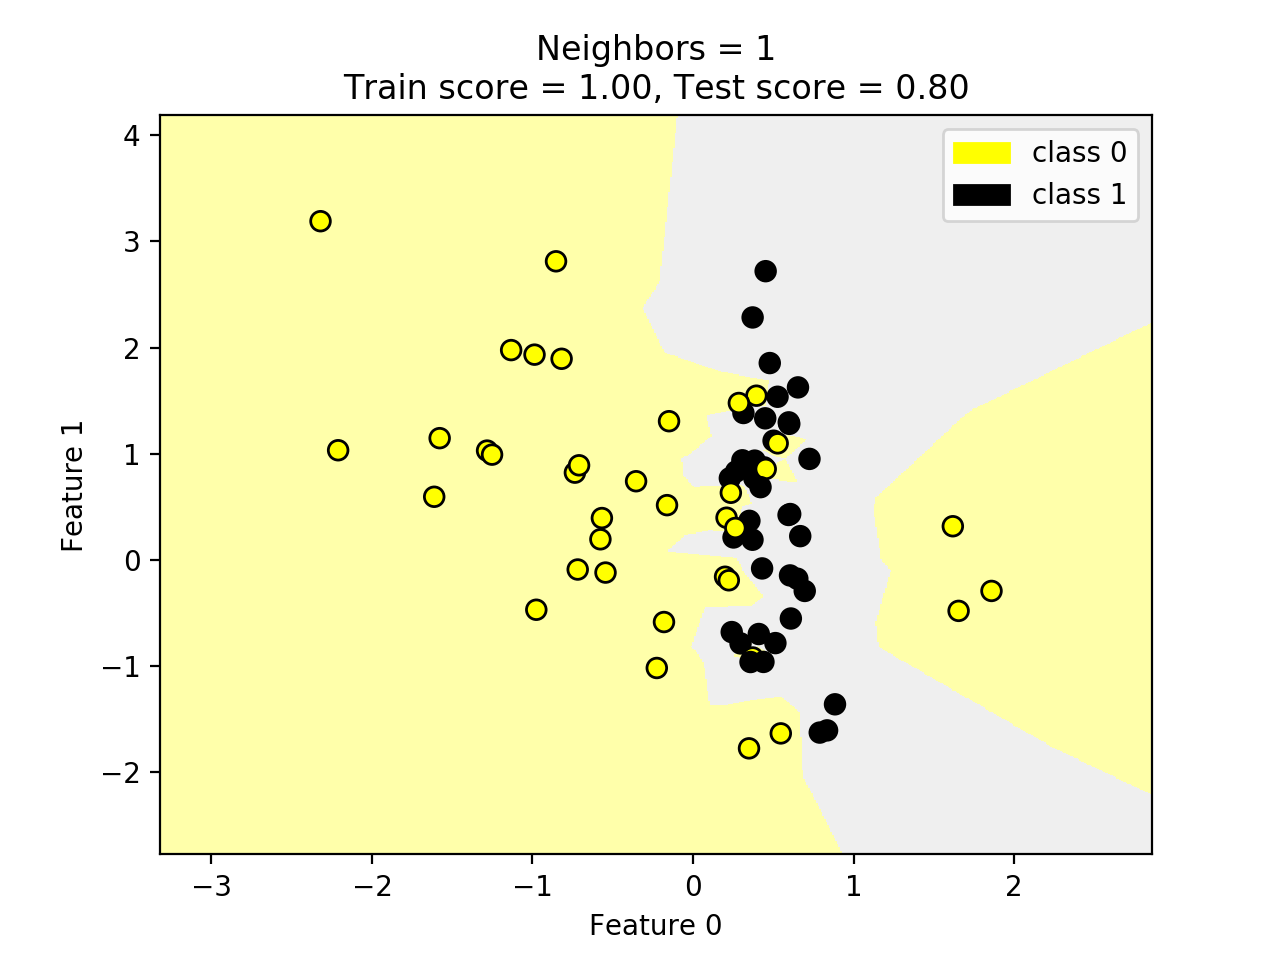

<IPython.core.display.Javascript object>


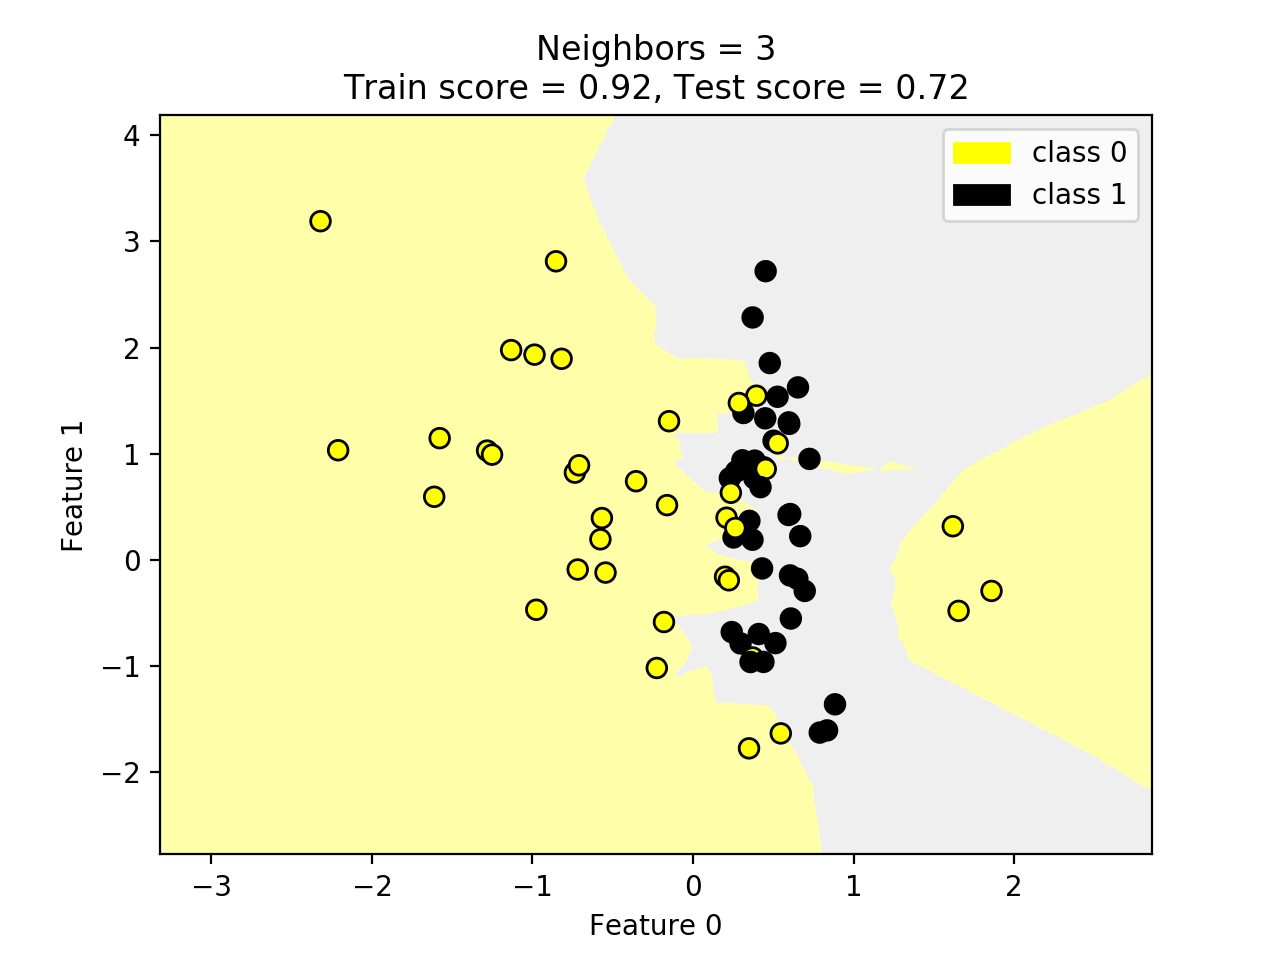

<IPython.core.display.Javascript object>


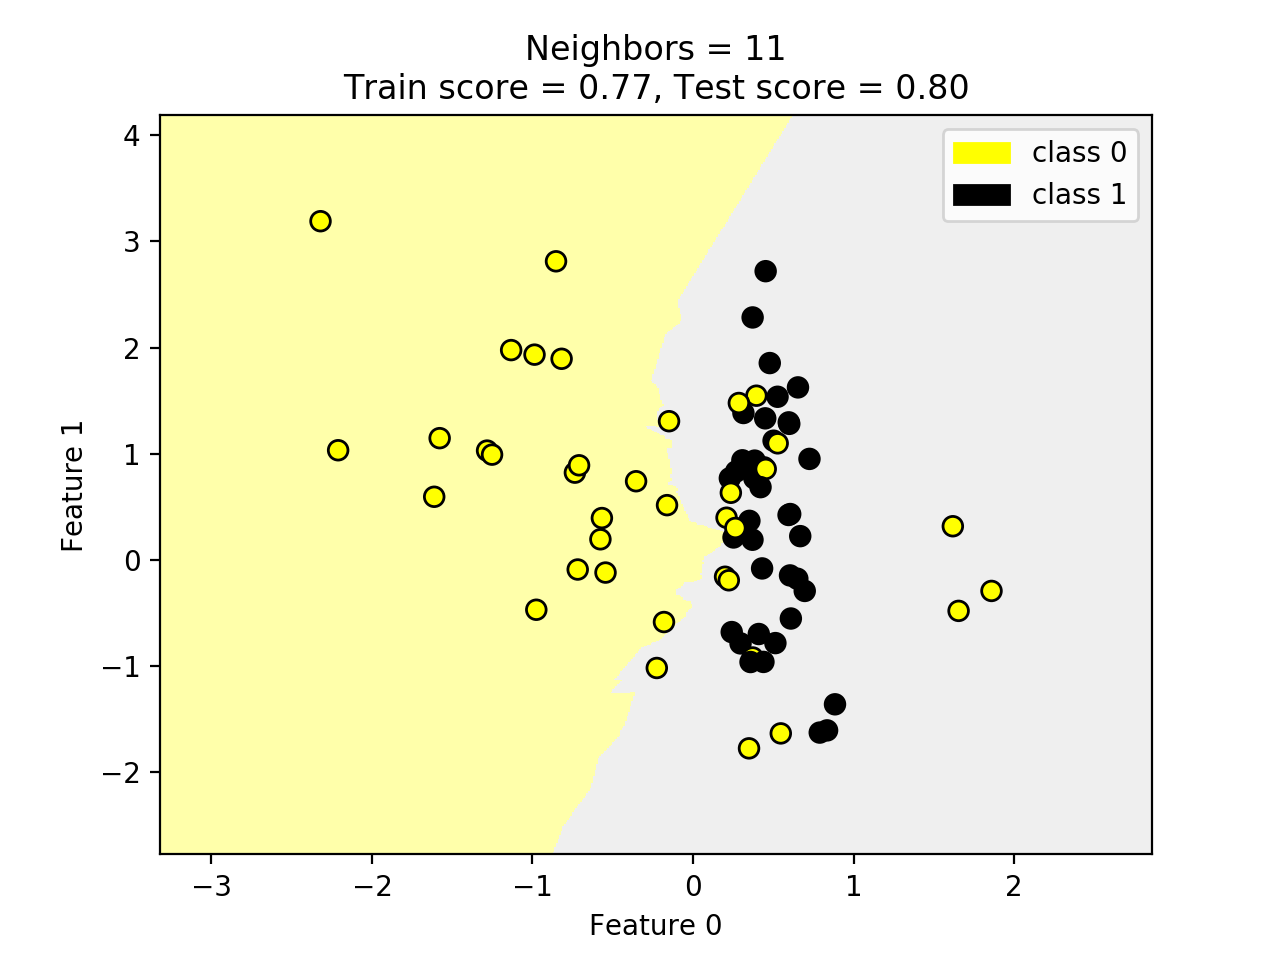

In [56]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

## regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print (knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


In [67]:
%config IPCompleter.greedy=True

<IPython.core.display.Javascript object>


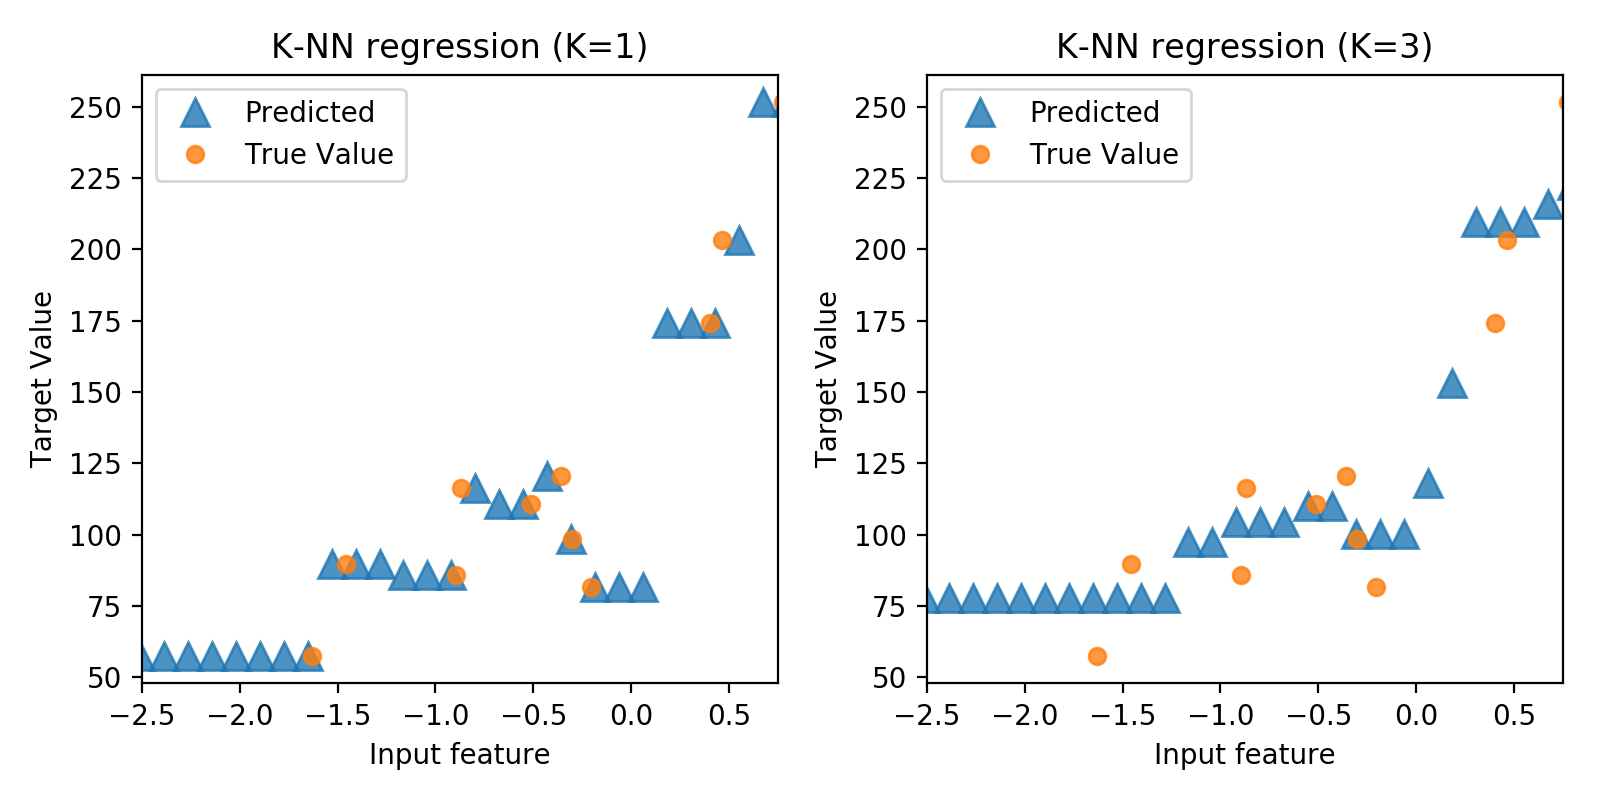

In [70]:
fig, subaxes = plt.subplots(1,2, figsize=(8,4))
X_predict_input = np.linspace(-3,3,50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for thisaxis, K in zip(subaxes, [1,3]):
    knnreg=KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input,y_predict_output, '^', markersize=10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o',label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target Value')
    thisaxis.set_title('K-NN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()